# Question: What sort of differences are we seeing between 1) the different admixtures of the nude mice, 2) different admixtures of the B6 mice, and 3) the nude and B6 mice of the same admixtures

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch

In [2]:
# Load the heatmap data
data_path ="results/interactions/" 
inter_data = {}
for file_name in [f for f in os.listdir(data_path) if ".csv" in f]:
    group = file_name.split("_")[0]
    df = pd.read_csv(data_path+file_name)
    df = df.set_index("Unnamed: 0", drop=True)
    inter_data[group] = df

#### We're going to cut off values at the 75th quartile because otherwise the outlier values make the plots impossible to interpret.

In [3]:
cutoff_values = {}
for group in inter_data:
    q = np.quantile(inter_data[group], 0.75)
    cutoff_values[group] = q
    inter_data[group] = inter_data[group].where(inter_data[group] >= q, q)

In [4]:
nude_sum = inter_data["Grp. B2 nude (80% C1; 20% C11)"].add(inter_data["Grp. B3 nude (50% C1; 50% C11)"])
nude_sum = nude_sum.add(inter_data["Grp. B4 nude (20% C1; 80% C11)"])

## 1. Compare admixtures of nude mice

#### First, let's plot the data.

#### (Higher values are a better fit.)

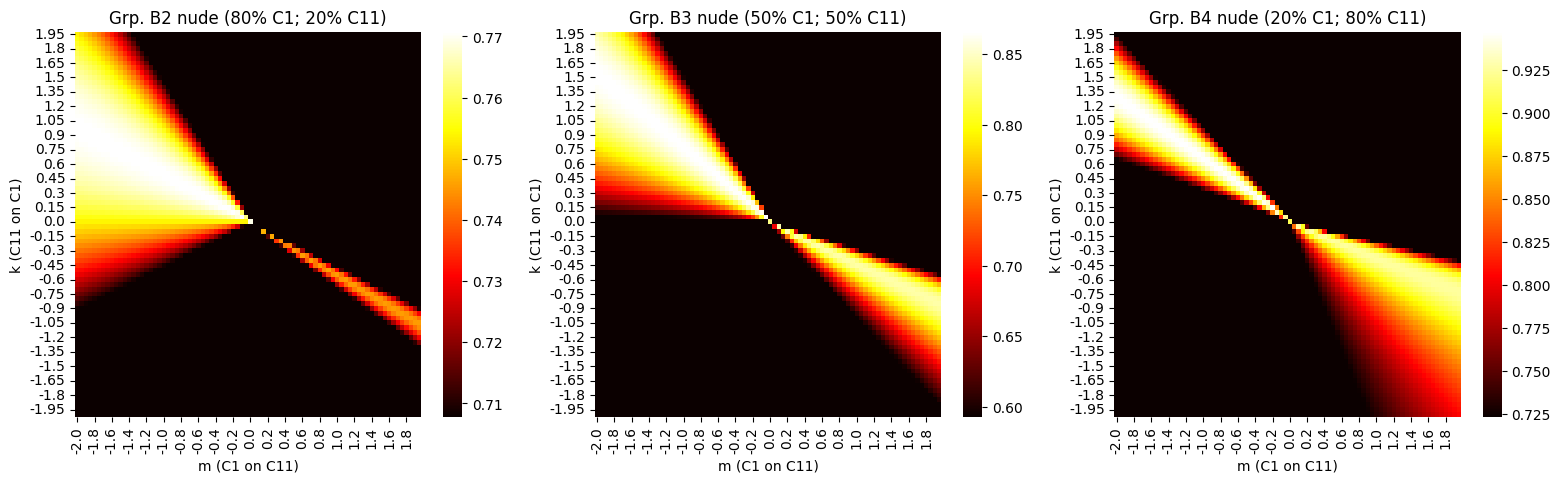

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(19,5))

sns.heatmap(inter_data["Grp. B2 nude (80% C1; 20% C11)"], cmap="hot", annot=False, ax=axes[0])
axes[0].set_ylabel("k (C11 on C1)")
axes[0].set_xlabel("m (C1 on C11)")
axes[0].set_title("Grp. B2 nude (80% C1; 20% C11)")

sns.heatmap(inter_data["Grp. B3 nude (50% C1; 50% C11)"], cmap="hot", annot=False, ax=axes[1])
axes[1].set_ylabel("k (C11 on C1)")
axes[1].set_xlabel("m (C1 on C11)")
axes[1].set_title("Grp. B3 nude (50% C1; 50% C11)")

sns.heatmap(inter_data["Grp. B4 nude (20% C1; 80% C11)"], cmap="hot", annot=False, ax=axes[2])
axes[2].set_ylabel("k (C11 on C1)")
axes[2].set_xlabel("m (C1 on C11)")
axes[2].set_title("Grp. B4 nude (20% C1; 80% C11)")
plt.show()

# sns.heatmap(nude_sum, cmap="hot", annot=False)
# axes[2].set_ylabel("m (C11 on C1)")
# axes[2].set_xlabel("k (C1 on C11)")
# axes[2].set_title("Sum of fits of nude admixtures")
# plt.show()

#### Second, let's binarize the data. We'll do that by setting the points greater than the 75th quartile to 1 and those less than to 0.

#### White = greater than the 75th quartile

#### Black = less than the 75th quartile

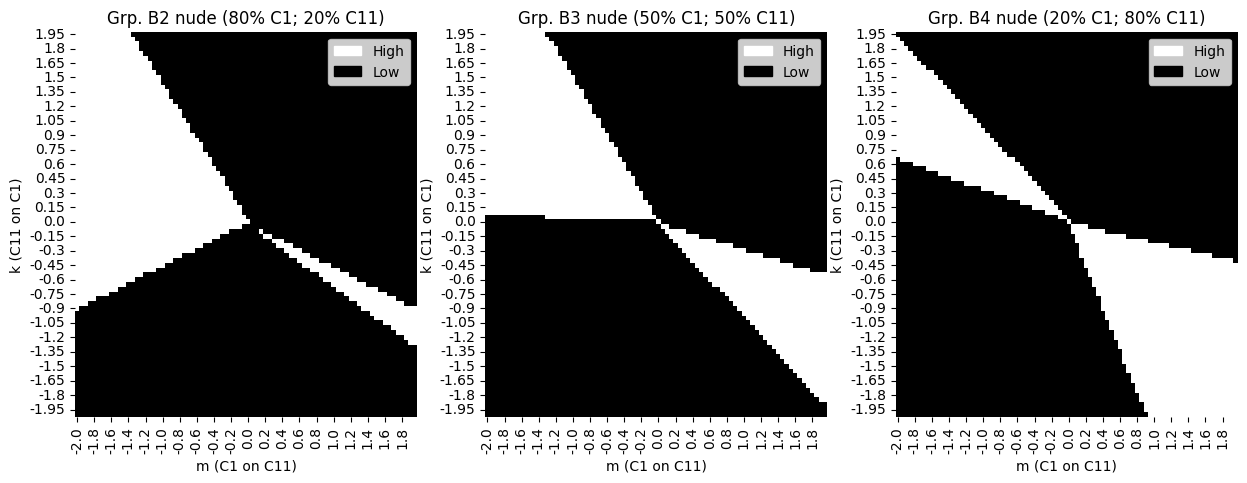

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df_b2 = inter_data["Grp. B2 nude (80% C1; 20% C11)"]
df_b2 = df_b2 > cutoff_values["Grp. B2 nude (80% C1; 20% C11)"]
sns.heatmap(df_b2, cmap=["black", "white"], annot=False, cbar=False, ax=axes[0])
axes[0].legend(handles=[Patch(color="white", label="High"),
                    Patch(color="black", label="Low")])
axes[0].set_ylabel("k (C11 on C1)")
axes[0].set_xlabel("m (C1 on C11)")
axes[0].set_title("Grp. B2 nude (80% C1; 20% C11)")

df_b3 = inter_data["Grp. B3 nude (50% C1; 50% C11)"]
df_b3 = df_b3 > cutoff_values["Grp. B3 nude (50% C1; 50% C11)"]
sns.heatmap(df_b3, cmap=["black", "white"], annot=False, cbar=False, ax=axes[1])
axes[1].legend(handles=[Patch(color="white", label="High"),
                    Patch(color="black", label="Low")])
axes[1].set_ylabel("k (C11 on C1)")
axes[1].set_xlabel("m (C1 on C11)")
axes[1].set_title("Grp. B3 nude (50% C1; 50% C11)")

df_b4 = inter_data["Grp. B4 nude (20% C1; 80% C11)"]
df_b4 = df_b4 > cutoff_values["Grp. B4 nude (20% C1; 80% C11)"]
sns.heatmap(df_b4, cmap=["black", "white"], annot=False, cbar=False, ax=axes[2])
axes[2].legend(handles=[Patch(color="white", label="High"),
                    Patch(color="black", label="Low")])
axes[2].set_ylabel("k (C11 on C1)")
axes[2].set_xlabel("m (C1 on C11)")
axes[2].set_title("Grp. B4 nude (20% C1; 80% C11)")
plt.show()

#### Now, let's see what data points are in the 75th quartile across all the admixtures.

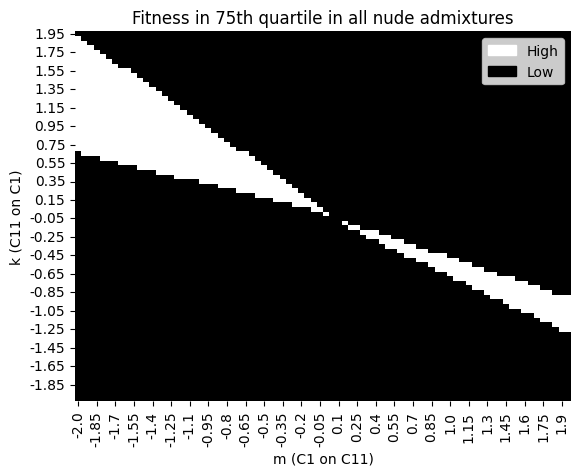

In [7]:
df_b = pd.DataFrame(index = df_b2.index, columns = df_b2.columns, dtype=np.bool_)
for r in df_b.index:
    for c in df_b.columns:
        df_b.loc[r, c] = df_b2.loc[r, c] and df_b3.loc[r, c] and df_b4.loc[r, c]
sns.heatmap(df_b, cmap=["black", "white"], annot=False, cbar=False)
plt.legend(handles=[Patch(color="white", label="High"),
                    Patch(color="black", label="Low")])
plt.ylabel("k (C11 on C1)")
plt.xlabel("m (C1 on C11)")
plt.title("Fitness in 75th quartile in all nude admixtures")
plt.show()

## 2. Compare admixtures of B6 mice

#### First, let's plot the data.

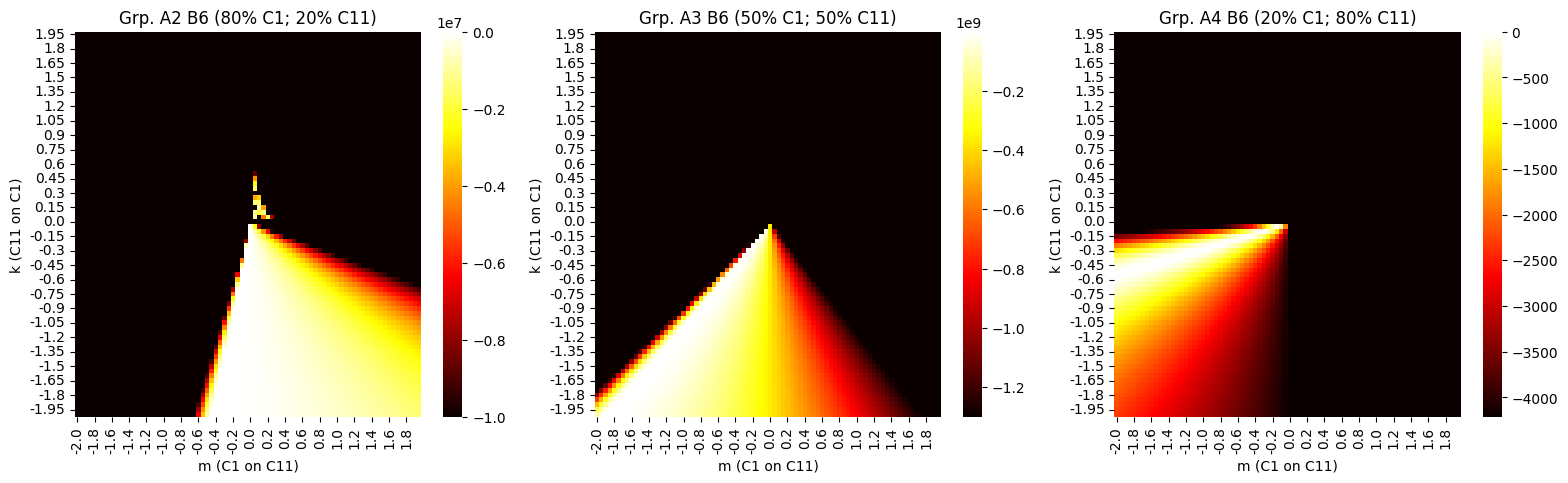

In [8]:
# b6_sum = inter_data["Grp. A2 B6 (80% C1; 20% C11)"].add(inter_data["Grp. A3 B6 (50% C1; 50% C11)"])
# b6_sum = b6_sum.add(inter_data["Grp. A4 B6 (20% C1; 80% C11)"])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(19,5))

sns.heatmap(inter_data["Grp. A2 B6 (80% C1; 20% C11)"], cmap="hot", annot=False, ax=axes[0])
axes[0].set_ylabel("k (C11 on C1)")
axes[0].set_xlabel("m (C1 on C11)")
axes[0].set_title("Grp. A2 B6 (80% C1; 20% C11)")

sns.heatmap(inter_data["Grp. A3 B6 (50% C1; 50% C11)"], cmap="hot", annot=False, ax=axes[1])
axes[1].set_ylabel("k (C11 on C1)")
axes[1].set_xlabel("m (C1 on C11)")
axes[1].set_title("Grp. A3 B6 (50% C1; 50% C11)")

sns.heatmap(inter_data["Grp. A4 B6 (20% C1; 80% C11)"], cmap="hot", annot=False, ax=axes[2])
axes[2].set_ylabel("k (C11 on C1)")
axes[2].set_xlabel("m (C1 on C11)")
axes[2].set_title("Grp. A4 B6 (20% C1; 80% C11)")
plt.show()

# sns.heatmap(b6_sum, cmap="hot", annot=False)
# plt.ylabel("m (C11 on C1)")
# plt.xlabel("k (C1 on C11)")
# plt.title("Sum of fitness of B6 admixtures")
# plt.show()

#### Second, let's binarize the data. Again, we'll set the values greater than the 75th quartile to 1 and those less to 0.

#### White = greater than the 75th quartile

#### Black = less than the 75th quartile

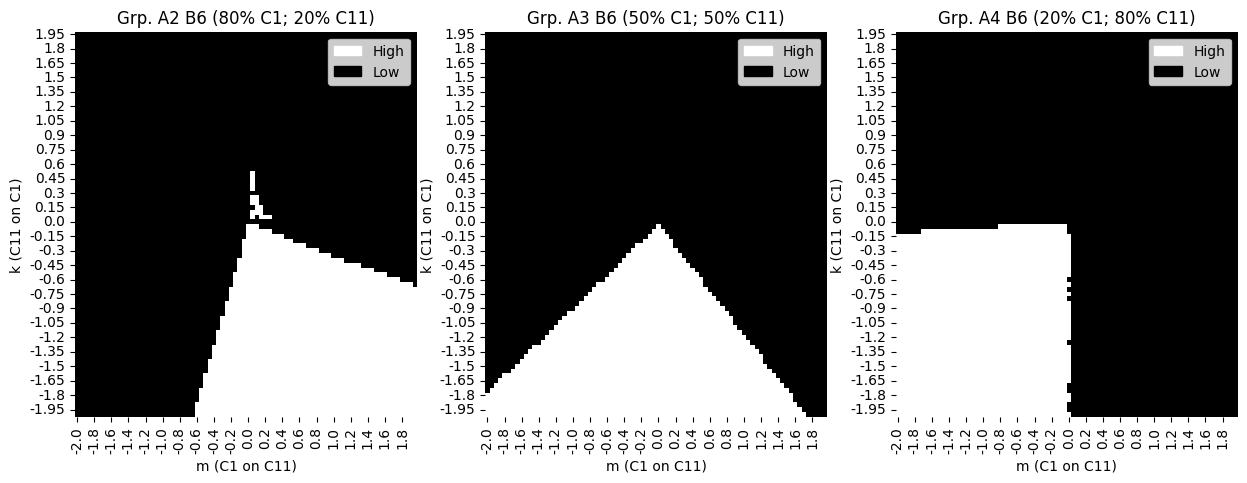

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

df_a2 = inter_data["Grp. A2 B6 (80% C1; 20% C11)"]
df_a2 = df_a2 > cutoff_values["Grp. A2 B6 (80% C1; 20% C11)"]
sns.heatmap(df_a2, cmap=["black", "white"], annot=False, cbar=False, ax=axes[0])
axes[0].legend(handles=[Patch(color="white", label="High"),
                    Patch(color="black", label="Low")])
axes[0].set_ylabel("k (C11 on C1)")
axes[0].set_xlabel("m (C1 on C11)")
axes[0].set_title("Grp. A2 B6 (80% C1; 20% C11)")

df_a3 = inter_data["Grp. A3 B6 (50% C1; 50% C11)"]
df_a3 = df_a3 > cutoff_values["Grp. A3 B6 (50% C1; 50% C11)"]
sns.heatmap(df_a3, cmap=["black", "white"], annot=False, cbar=False, ax=axes[1])
axes[1].legend(handles=[Patch(color="white", label="High"),
                    Patch(color="black", label="Low")])
axes[1].set_ylabel("k (C11 on C1)")
axes[1].set_xlabel("m (C1 on C11)")
axes[1].set_title("Grp. A3 B6 (50% C1; 50% C11)")

df_a4 = inter_data["Grp. A4 B6 (20% C1; 80% C11)"]
df_a4 = df_a4 > cutoff_values["Grp. A4 B6 (20% C1; 80% C11)"]
sns.heatmap(df_a4, cmap=["black", "white"], annot=False, cbar=False, ax=axes[2])
axes[2].legend(handles=[Patch(color="white", label="High"),
                    Patch(color="black", label="Low")])
axes[2].set_ylabel("k (C11 on C1)")
axes[2].set_xlabel("m (C1 on C11)")
axes[2].set_title("Grp. A4 B6 (20% C1; 80% C11)")

plt.show()

#### Now, let's see what data points are in the 75th quartile across all the admixtures.

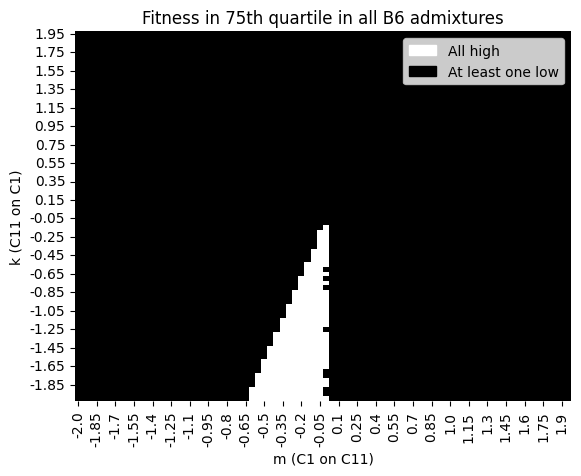

In [10]:
df_a = pd.DataFrame(index = df_a2.index, columns = df_a2.columns, dtype=np.bool_)
for r in df_a.index:
    for c in df_a.columns:
        df_a.loc[r, c] = df_a2.loc[r, c] and df_a3.loc[r, c] and df_a4.loc[r, c]
sns.heatmap(df_a, cmap=["black", "white"], annot=False, cbar=False)
plt.legend(handles=[Patch(color="white", label="All high"),
                    Patch(color="black", label="At least one low")])
plt.ylabel("k (C11 on C1)")
plt.xlabel("m (C1 on C11)")
plt.title("Fitness in 75th quartile in all B6 admixtures")

plt.show()

## Compare the nude and B6 mice of the same admixtures

#### I took the binarized data from above, and calculated the differences between the nude and B6 admixtures:

#### White = Both are greater than quartile

#### Blue = Nude fitness is greater than quartile, B6 fitness is less than quartile (decrease fitness with immunity)

#### Red = B6 fitness is greater than quartile, Nude fitness is lower than quartile (increase fitness with immunity)

#### Black = Both are less than quartile

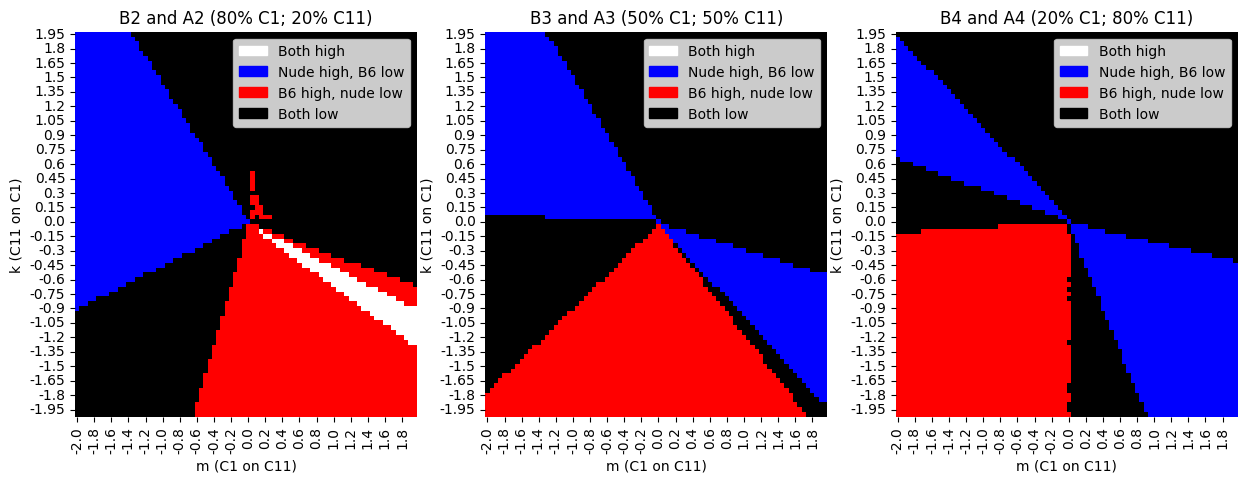

In [11]:
df_2 = pd.DataFrame(index = df_b2.index, columns = df_b2.columns, dtype=float)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for r in df_2.index:
    for c in df_2.columns:
        if df_b2.loc[r, c] and df_a2.loc[r, c]:
            df_2.loc[r, c] = 1
        elif df_b2.loc[r, c] > df_a2.loc[r, c]:
            df_2.loc[r, c] = 0
        elif df_b2.loc[r, c] < df_a2.loc[r, c]:
            df_2.loc[r, c] = -1
        else: 
            df_2.loc[r, c] = -2
sns.heatmap(df_2, cmap=["black", "red", "blue", "white"], cbar=False, ax=axes[0])
axes[0].legend(handles=[Patch(color="white", label="Both high"),
                    Patch(color="blue", label="Nude high, B6 low"),
                    Patch(color="red", label="B6 high, nude low"),
                    Patch(color="black", label="Both low")])
axes[0].set_ylabel("k (C11 on C1)")
axes[0].set_xlabel("m (C1 on C11)")
axes[0].set_title("B2 and A2 (80% C1; 20% C11)")

df_3 = pd.DataFrame(index = df_b3.index, columns = df_b3.columns, dtype=float)
for r in df_3.index:
    for c in df_3.columns:
        if df_b3.loc[r, c] and df_a3.loc[r, c]:
            df_3.loc[r, c] = 1
        elif df_b3.loc[r, c] > df_a3.loc[r, c]:
            df_3.loc[r, c] = 0
        elif df_b3.loc[r, c] < df_a3.loc[r, c]:
            df_3.loc[r, c] = -1
        else: 
            df_3.loc[r, c] = -2
sns.heatmap(df_3, cmap=["black", "red", "blue"], cbar=False, ax=axes[1]) # Exclude white because there is no overlap of both being high
axes[1].legend(handles=[Patch(color="white", label="Both high"),
                    Patch(color="blue", label="Nude high, B6 low"),
                    Patch(color="red", label="B6 high, nude low"),
                    Patch(color="black", label="Both low")])
axes[1].set_ylabel("k (C11 on C1)")
axes[1].set_xlabel("m (C1 on C11)")
axes[1].set_title("B3 and A3 (50% C1; 50% C11)")

df_4 = pd.DataFrame(index = df_b4.index, columns = df_b4.columns, dtype=float)
for r in df_4.index:
    for c in df_4.columns:
        if df_b4.loc[r, c] and df_a4.loc[r, c]:
            df_4.loc[r, c] = 1
        elif df_b4.loc[r, c] > df_a4.loc[r, c]:
            df_4.loc[r, c] = 0
        elif df_b4.loc[r, c] < df_a4.loc[r, c]:
            df_4.loc[r, c] = -1 
        else:
            df_4.loc[r, c] = -2
sns.heatmap(df_4, cmap=["black", "red", "blue"], cbar=False, ax=axes[2]) # Exclude white because there is no overlap of both being high
axes[2].legend(handles=[Patch(color="white", label="Both high"),
                    Patch(color="blue", label="Nude high, B6 low"),
                    Patch(color="red", label="B6 high, nude low"),
                    Patch(color="black", label="Both low")])
axes[2].set_ylabel("k (C11 on C1)")
axes[2].set_xlabel("m (C1 on C11)")
axes[2].set_title("B4 and A4 (20% C1; 80% C11)")
plt.show()